<h1>Assignment of KPIs with Pandas</h1>

## importing the datasets

In [3]:
import pandas as pd

In [4]:
customers = pd.read_csv('customers.csv')
articles = pd.read_csv('articles.csv')
transactions = pd.read_csv('transactions_sample.csv')

/var/folders/tc/gsf9d1s50h1djgbb73vkr6100000gn/T/ipykernel_89981/18915459.py:3: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv('transactions_sample.csv')


## Customers KPI's

In [5]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


### Total number of customers

In [6]:
total_customer_count = len(customers['customer_id'])
print('Total Customer Count: ' + str(total_customer_count))

Total Customer Count: 1048575


### Average age of customers

In [7]:
average_customer_age = customers['age'].mean()
print('Average Customer Age: ' + str(average_customer_age))

Average Customer Age: 36.39347390865981


### info about the fashion-news-frequency

In [8]:
fashion_news = customers.groupby('fashion_news_frequency').mean()
fashion_news = fashion_news[['age']]
fashion_news.rename(columns={'age': 'average_customer_age'}, inplace=True)
fashion_news['total_count'] = customers.groupby('fashion_news_frequency').count().age
fashion_news['percentage'] = (fashion_news['total_count'] / total_customer_count) * 100
fashion_news

/var/folders/tc/gsf9d1s50h1djgbb73vkr6100000gn/T/ipykernel_89981/3009942069.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fashion_news = customers.groupby('fashion_news_frequency').mean()


,average_customer_age,total_count,percentage
fashion_news_frequency,,,
Monthly,39.300156,643,0.061321
NONE,36.012526,660840,63.022674
None,38.000000,1,0.000095
Regularly,37.033402,364351,34.747252


<Axes: title={'center': 'Fashion News Frequency Percentages'}, ylabel='percentage'>

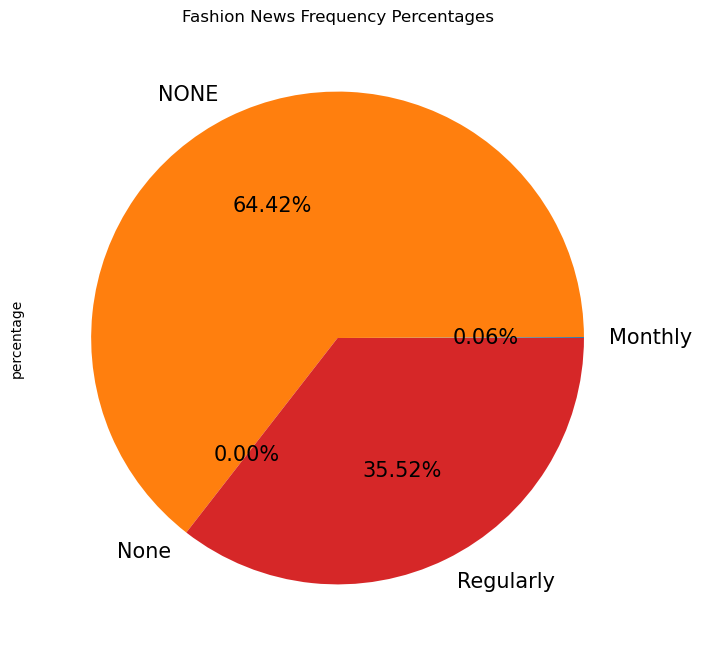

In [9]:
fashion_news["percentage"].plot.pie(autopct = '%1.2f%%',
                                              title = "Fashion News Frequency Percentages",
                                              figsize = (8,8),
                                              fontsize = 15)

### percentages of club member status

In [10]:
# separating it into active, left club, and pre-create
club_member_status = customers.groupby('club_member_status').count()
club_member_status = club_member_status[['customer_id']]
club_member_status.rename(columns={'customer_id': 'count'}, inplace=True)
club_member_status['percentage'] = (club_member_status['count'] / total_customer_count) * 100
club_member_status

,count,percentage
club_member_status,,
ACTIVE,972599,92.754357
LEFT CLUB,348,0.033188
PRE-CREATE,71024,6.773383


<Axes: title={'center': 'Club Member Status Percentages'}, ylabel='percentage'>

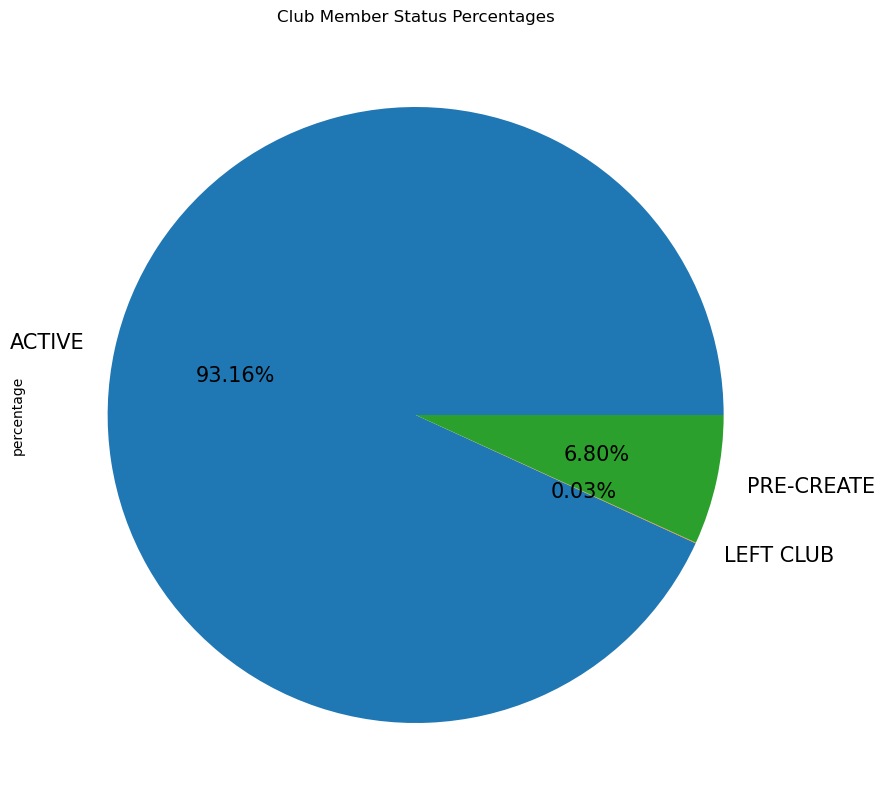

In [11]:
club_member_status["percentage"].plot.pie(autopct = '%1.2f%%',
                                              title = "Club Member Status Percentages",
                                              figsize = (10,10),
                                              fontsize = 15)

## Articles KPI's

In [12]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


### Total article count

In [13]:
total_article_count = len(articles['article_id'])
print('Total Article Count: ' + str(total_article_count))

Total Article Count: 105542


### Amount of product codes (different articles)

In [14]:
product_code_count = len(articles.groupby('product_code').count().article_id)
print('Total count of distinct product codes: ' + str(product_code_count))

Total count of distinct product codes: 47224


### Total articles count in mens sections

In [15]:
men = articles[articles.section_name.str.contains("Men")]
men_prod = men.groupby('section_name').count()
men_prod = men_prod[['article_id']]
men_prod.rename(columns={'article_id': 'count'}, inplace=True)
men_prod

,count
section_name,
Denim Men,521
Men Accessories,1337
Men Edition,330
Men H&M Sport,872
Men Other,25
Men Other 2,190
Men Project,298
Men Shoes,645
Men Suits & Tailoring,1428


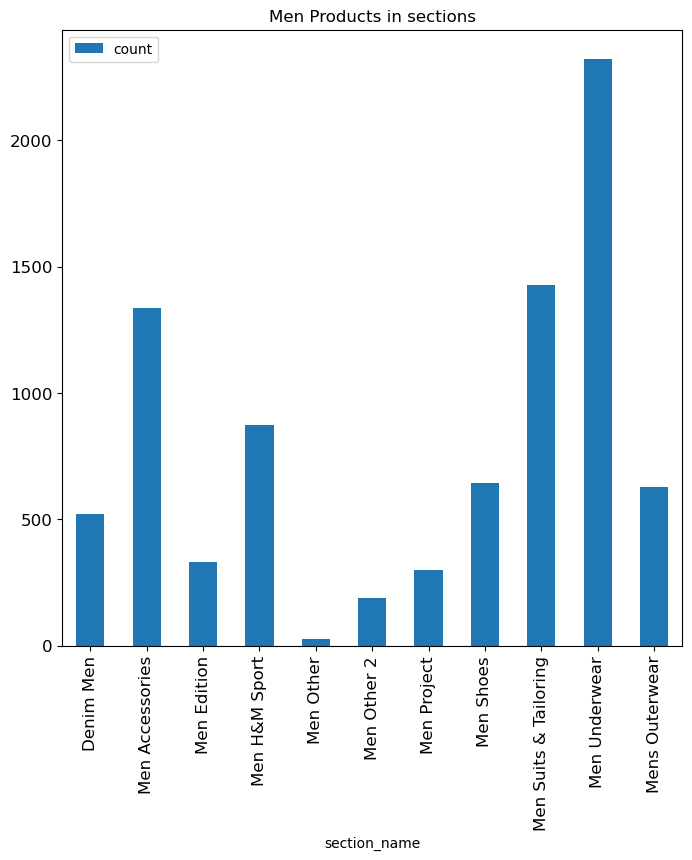

In [16]:
ax = men_prod.plot.bar(title = "Men Products in sections",
                                              figsize = (8,8),
                                              fontsize = 12)

### Total articles count in womens sections

In [17]:
women = articles[articles.section_name.str.contains("Women")]
women_prod = women.groupby('section_name').count()
women_prod = women_prod[['article_id']]
women_prod.rename(columns={'article_id': 'count'}, inplace=True)
women_prod

,count
section_name,
Womens Big accessories,1665
Womens Casual,2725
Womens Everyday Basics,1581
Womens Everyday Collection,7295
Womens Jackets,829
Womens Lingerie,3598
"Womens Nightwear, Socks & Tigh",1566
Womens Premium,1270
Womens Shoes,2026


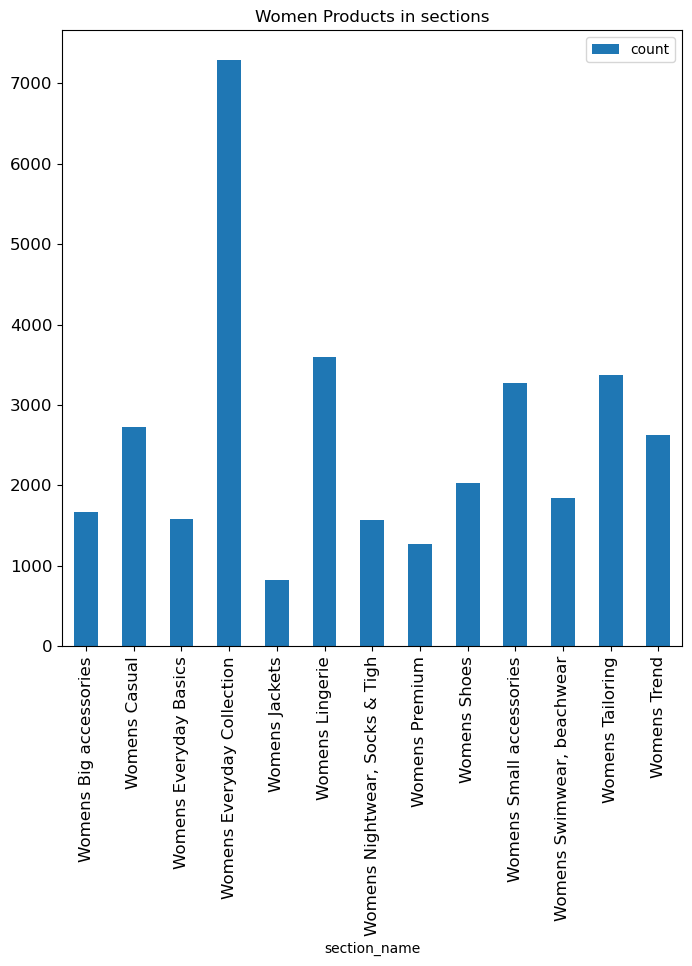

In [18]:
ax = women_prod.plot.bar(title = "Women Products in sections",
                                              figsize = (8,8),
                                              fontsize = 12)

### Percentages by color

In [19]:
colors = articles.groupby('colour_group_name').count()
colors = colors[['colour_group_code']]
colors.rename(columns={'colour_group_code': 'count'}, inplace=True)
colors['percentage'] = (colors['count'] / total_article_count) * 100
colors

,count,percentage
colour_group_name,,
Beige,2712,2.569593
Black,22670,21.479601
Blue,3308,3.134297
Bronze/Copper,94,0.089064
Dark Beige,1084,1.027079
Dark Blue,12171,11.531902
Dark Green,2106,1.995414
Dark Grey,2731,2.587595
Dark Orange,886,0.839476


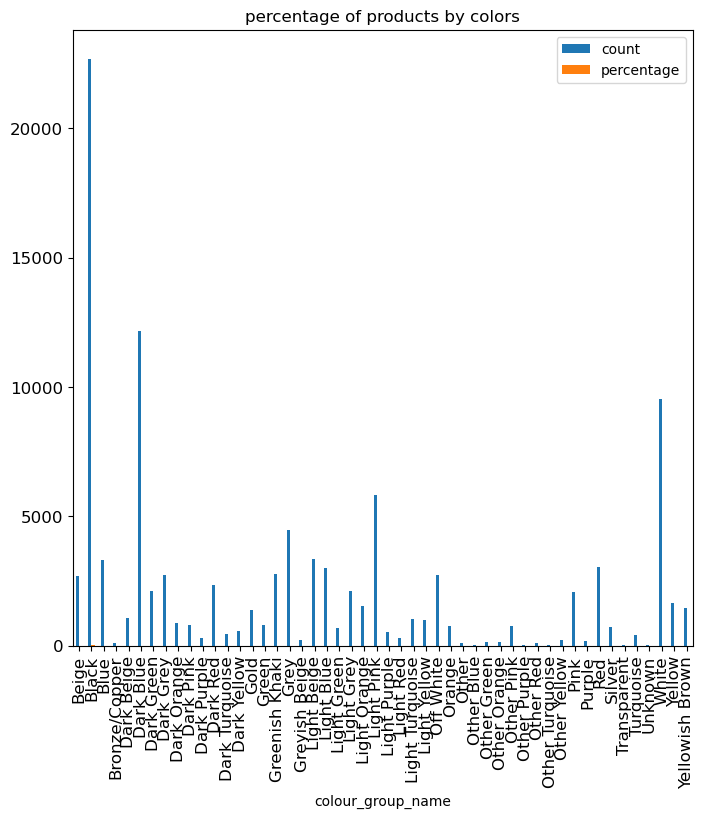

In [23]:
ax = colors.plot.bar(title = "percentage of products by colors",
                                              figsize = (8,8),
                                              fontsize = 12)

## Transactions KPI's

In [21]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,9/20/18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,sum price,17921.728750,NaN
1,9/20/18,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,mean price,0.029870,NaN
2,9/20/18,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,NaN,NaN,sum online,5440.732508,30%
3,9/20/18,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,NaN,NaN,sum offline,12480.996240,70%
4,9/20/18,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,NaN,NaN,NaN,NaN,NaN


### Total revenue from sales:

In [24]:
total_revenue = sum(transactions['price'])
print('Total Revenue On Sales: ' + str(total_revenue))

Total Revenue On Sales: 17921.728721602944


### Average transaction value:

In [25]:
average_transaction_value = total_revenue / len(transactions['price'])
print('Average Transaction Value: ' + str(average_transaction_value))

Average Transaction Value: 0.02986954786933824


### Total number of sales for each date

In [ ]:
sales_date_variation = transactions.groupby('t_dat').count()
sales_date_variation = sales_date_variation[['price']]
sales_date_variation.rename(columns={'price': 'sales'}, inplace=True)
sales_date_variation['revenue'] = transactions.groupby('t_dat').sum().price
sales_date_variation

/var/folders/d4/wk10dvqd6g3gczxjqr388mlm0000gn/T/ipykernel_3590/3597099438.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_date_variation['revenue'] = transactions.groupby('t_dat').sum().price


,sales,revenue
t_dat,,
10/1/18,5224,166.089152
9/20/18,48399,1415.345845
9/21/18,47543,1419.262302
9/22/18,17635,530.437626
9/23/18,52230,1593.783082
9/24/18,45984,1407.609608
9/25/18,43857,1322.879811
9/26/18,48224,1434.204455
9/27/18,44261,1355.498286


### Percentage of sales for each sales channel

In [ ]:
total_sales_channel_1 = len(transactions[transactions['sales_channel_id'] == 1])
total_sales_channel_2 = len(transactions[transactions['sales_channel_id'] == 2])

percentage_channel_1 = (total_sales_channel_1 / len(transactions['sales_channel_id'])) * 100
percentage_channel_2 = (total_sales_channel_2 / len(transactions['sales_channel_id'])) * 100

print('Percentage Channel 1: ' + str(percentage_channel_1) + '%')
print('Percentage Channel 2: ' + str(percentage_channel_2) + '%')

Percentage Channel 1: 34.736333333333334%
Percentage Channel 2: 65.26366666666667%


## Sales Growth Over time

<AxesSubplot: title={'center': 'Sales Overtime'}, xlabel='t_dat'>

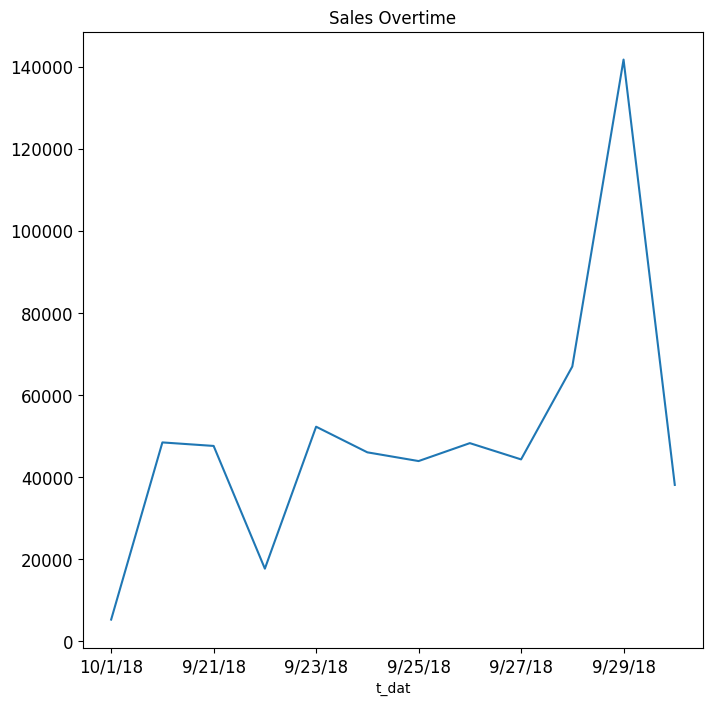

In [ ]:
sales_date_variation['sales'].plot(title = "Sales Overtime",
                                              figsize = (8,8),
                                              fontsize = 12)

## Revenue Growth Over Time

<AxesSubplot: title={'center': 'Revenue Overtime'}, xlabel='t_dat'>

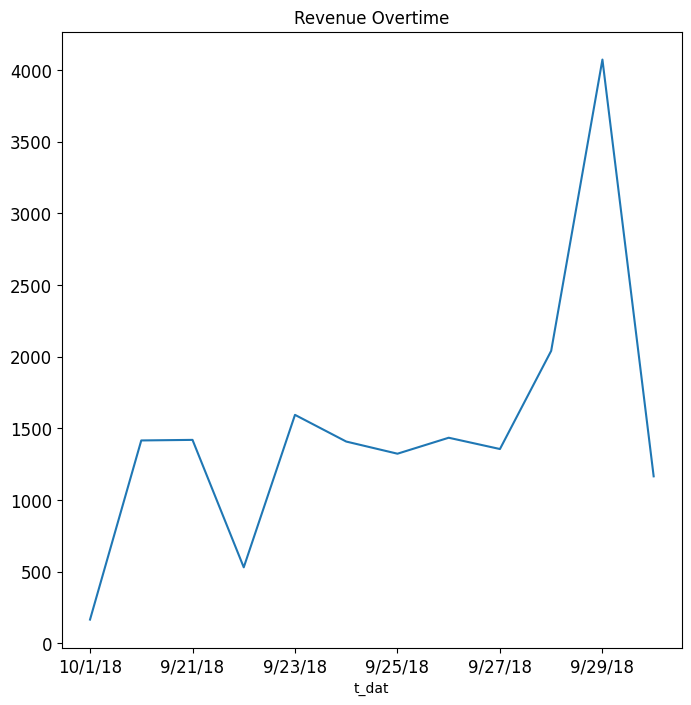

In [ ]:
sales_date_variation['revenue'].plot(title = "Revenue Overtime",
                                              figsize = (8,8),
                                              fontsize = 12)

## KPI's for Particular Customers

In [ ]:
main_df = customers.merge(transactions, on='customer_id', how='left')
main_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,9/21/18,583558001.0,0.067780,2.0,NaN,NaN,NaN,NaN,NaN
2,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,9/21/18,639677008.0,0.025407,2.0,NaN,NaN,NaN,NaN,NaN
3,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,9/21/18,640244003.0,0.033881,2.0,NaN,NaN,NaN,NaN,NaN
4,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,9/25/18,521269001.0,0.033881,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401963,c3b8cdf571361bc5bdb61d45c5ab600d9327b0925568a0...,NaN,NaN,ACTIVE,NONE,23.0,3e5fb853e4bb86d2e08f74da7ed01dda608f76c1472561...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401964,c3b8dc6674b080f4e16099302514d7763f397d722371f4...,NaN,NaN,ACTIVE,NONE,59.0,93e2111dc03fe691f9f121310e60343037144a64ffa2c3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401965,c3b8efac2109f5430b0864d15216c8752e6a2992417bb1...,NaN,NaN,ACTIVE,NONE,69.0,4c02c2d91950f74f85e4e9eea4ab1c8e3d3df1e67ac780...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401966,c3b8f429b723ebac0a4c1b9c0c69061d81c5247bf0980a...,1.0,NaN,ACTIVE,Regularly,42.0,4fad93b6017b67a510a9e7c9d43623925d910a126251c0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Total expenses of particular customer

In [ ]:
total_expenses = customer_par['price'].sum()
print(f"total expenses: {total_expenses} ")

total expenses: 0.29138983100000004 


### Sales information for particular customers

In [ ]:
customer_par = main_df[main_df['customer_id']=='0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa']
customer_par = customer_par.merge(articles, on='article_id', how='left')
customer_par = customer_par[['t_dat', 'article_id', 'price', 'sales_channel_id', 'prod_name', 'department_name', 'detail_desc']]
customer_par

,t_dat,article_id,price,sales_channel_id,prod_name,department_name,detail_desc
0,9/21/18,583558001.0,0.067780,2.0,Noel denim dress,Dresses,"Short, fitted dress in stretch denim with a co..."
1,9/21/18,639677008.0,0.025407,2.0,Portofino ISW 28,Blouse,"Shirt in a cotton weave with a collar, buttons..."
2,9/21/18,640244003.0,0.033881,2.0,CORY CORD SKIRT,Skirts,Short 5-pocket skirt in cotton corduroy with a...
3,9/25/18,521269001.0,0.033881,2.0,Sirpa mockneck,Tops Knitwear,"Jumper in a soft, rib knit with a small, ribbe..."
4,9/25/18,666448006.0,0.025407,2.0,Janet sweater,Knitwear,"Long-sleeved jumper in a soft, fine knit with ..."
5,9/27/18,583558001.0,0.067780,2.0,Noel denim dress,Dresses,"Short, fitted dress in stretch denim with a co..."
6,9/27/18,673677002.0,0.016932,2.0,Henry polo. (1),Knitwear,"Jumper in a soft, fine knit with a ribbed polo..."
7,9/29/18,666448006.0,0.020322,1.0,Janet sweater,Knitwear,"Long-sleeved jumper in a soft, fine knit with ..."


### Percentage of purchases by department for a particular customer

In [ ]:
dpt_customer = customer_par.groupby('department_name').count()
dpt_customer = dpt_customer[['article_id']]
dpt_customer.rename(columns={'article_id': 'sales'}, inplace=True)
dpt_customer['percentage'] = (dpt_customer['sales'] / len(customer_par['t_dat'])) * 100
dpt_customer

,sales,percentage
department_name,,
Blouse,1,12.5
Dresses,2,25.0
Knitwear,3,37.5
Skirts,1,12.5
Tops Knitwear,1,12.5


<AxesSubplot: title={'center': 'My customer purchases Percentages'}, ylabel='percentage'>

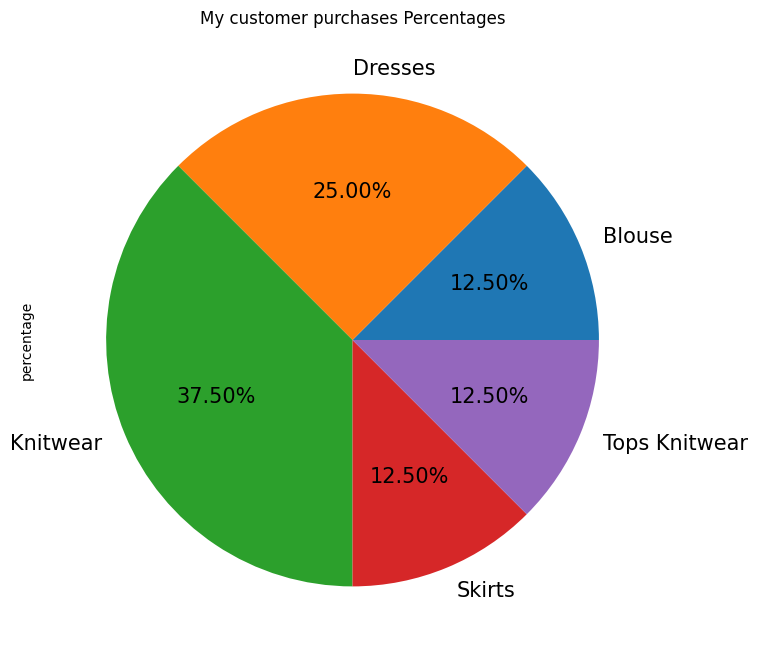

In [ ]:
dpt_customer["percentage"].plot.pie(autopct = '%1.2f%%',
                                              title = "My customer purchases Percentages",
                                              figsize = (8,8),
                                              fontsize = 15)